# Imports and Installation of Requred Dependancy

We have got 1.pcap file for this assignment as our group no was 10, ie. 10 % 9 = 1

In [8]:
!pip install pyshark
!pip install scapy

In [9]:
from scapy.all import rdpcap
import matplotlib.pyplot as plt
import pyshark

In [10]:
# packets = rdpcap('1.pcap')
packets = rdpcap('captured.pcap')

In [11]:
print(packets)

<captured.pcap: TCP:11440 UDP:15846 ICMP:0 Other:12796>


# Part 1: Metrics and Plots

1. Find the total amount of data transferred (in bytes), the total number of packets transferred, and the
minimum, maximum, and average packet sizes. Also, show the distribution of packet sizes (e.g., by
plotting a histogram of packet sizes).

Total amount of data transferred: 24528584 bytes
Total number of packets transferred: 40082
Minimum packet size: 42 bytes
Maximum packet size: 62834 bytes
Average packet size: 611.96 bytes
Distribution of packet sizes (histogram of packet sizes)


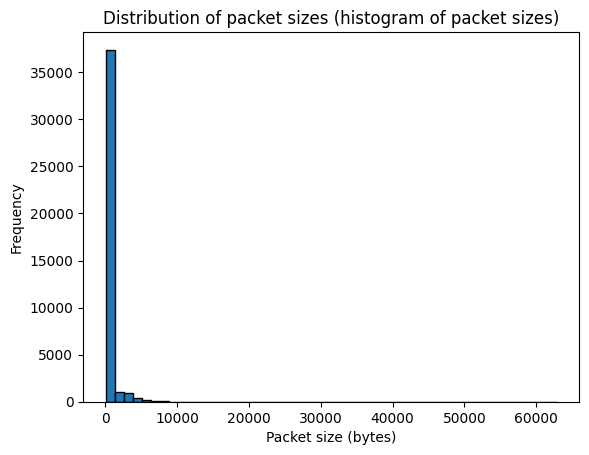

In [12]:
dataTransferred = 0
packetSizes = []

for pkt in packets:
  # diffrence in pkt.payload vs pkt
  dataTransferred += len(pkt)
  packetSizes.append(len(pkt))

totalPackets = len(packets)
avgSize = dataTransferred / totalPackets

print(f'Total amount of data transferred: {dataTransferred} bytes')
print(f"Total number of packets transferred: {totalPackets}")
print(f'Minimum packet size: {min(packetSizes)} bytes')
print(f'Maximum packet size: {max(packetSizes)} bytes')
print(f'Average packet size: {avgSize:.2f} bytes')

print("Distribution of packet sizes (histogram of packet sizes)")
plt.hist(packetSizes, bins=50, edgecolor='black')
plt.xlabel('Packet size (bytes)')
plt.ylabel('Frequency')
plt.title('Distribution of packet sizes (histogram of packet sizes)')
plt.show()

# print("Packet sizes vs. packet number")
# plt.plot(range(totalPackets), packetSizes, marker='o', linestyle='-', color='b')
# plt.xlabel('Packet Number')
# plt.ylabel('Packet Size (bytes)')
# plt.title('Packet Sizes vs. Packet Number')
# plt.grid(True)
# plt.show()

1. if we use len(pkt)

Total amount of data transferred: 364643263 bytes

Total number of packets transferred: 806013

Minimum packet size: 42 bytes

Maximum packet size: 1514 bytes

Average packet size: 452.40 bytes


\

2. if we use len(pkt.payload)

Total amount of data transferred: 353359081 bytes

Total number of packets transferred: 806013

Minimum packet size: 42 bytes

Maximum packet size: 1514 bytes

Average packet size: 438.40 bytes

2. Find unique source-destination pairs (source IP:port and destination IP:port) in the captured data.

In [13]:
# uniquePairs = []
uniquePairsTCP = set()
uniquePairsUDP = set()


for pkt in packets:
  if pkt.haslayer('IP') and (pkt.haslayer('TCP') or pkt.haslayer('UDP')):
    srcIP = pkt['IP'].src
    dstIP = pkt['IP'].dst

    if(pkt.haslayer('TCP')):
      srcPort = pkt['TCP'].sport
      dstPort = pkt['TCP'].dport
      pair = (srcIP, srcPort, dstIP, dstPort)
      if pair not in uniquePairsTCP:
        uniquePairsTCP.add(pair)

    # ASSUMTIONS
    # Que: consider UDP in unique port calculation?
    ##### if no --> comment the below part from for loop => Unique pairs --> 41077 -place pe- 32493

    if(pkt.haslayer('UDP')):
      srcPort = pkt['UDP'].sport
      dstPort = pkt['UDP'].dport
      pair = (srcIP, srcPort, dstIP, dstPort)
      if pair not in uniquePairsUDP:
        uniquePairsUDP.add(pair)

print('unique source-destination pairs with TCP port')
for pair in uniquePairsTCP:
  print(pair)

print('unique source-destination pairs with UDP port')
for pair in uniquePairsUDP:
  print(pair)

print(f'Total number of unique source-destination pairs in the captured data are {len(uniquePairsTCP) + len(uniquePairsUDP)}')
print(f'out of which {len(uniquePairsTCP)} are TCP connections and {len(uniquePairsUDP)} are UDP connections')

unique source-destination pairs with TCP port
('142.250.183.106', 443, '10.0.2.15', 43492)
('10.0.2.15', 44104, '142.250.192.138', 443)
('10.0.2.15', 43500, '142.250.183.106', 443)
('142.251.42.42', 443, '10.0.2.15', 52136)
('142.250.77.238', 443, '10.0.2.15', 51188)
('104.18.32.47', 443, '10.0.2.15', 49050)
('10.0.2.15', 43650, '3.233.158.24', 443)
('34.120.208.123', 443, '10.0.2.15', 48900)
('10.0.2.15', 57688, '142.250.70.42', 443)
('142.251.42.14', 443, '10.0.2.15', 42626)
('10.0.2.15', 36290, '216.58.200.195', 443)
('10.0.2.15', 36266, '216.58.200.195', 443)
('10.0.2.15', 48900, '34.120.208.123', 443)
('10.0.2.15', 34472, '142.251.42.14', 443)
('142.251.175.84', 443, '10.0.2.15', 50870)
('10.0.2.15', 40206, '142.250.77.238', 443)
('10.0.2.15', 32982, '142.250.194.165', 443)
('104.18.32.47', 443, '10.0.2.15', 54778)
('104.18.32.47', 443, '10.0.2.15', 42602)
('172.64.155.209', 443, '10.0.2.15', 39008)
('10.0.2.15', 52784, '34.110.138.217', 443)
('142.250.199.170', 443, '10.0.2.15', 

3. Display a dictionary where the key is the IP address and the value is the total flows for that IP address
as the source. Similarly display a dictionary where the key is the IP address and the value is the total
flows for that IP address as the destination. Find out which source-destination (source IP:port and
destination IP:port) have transferred the most data.

In [14]:
# ASSUMTIONS
# what we have to show Data Flow or count no of flows through this port
# In Find out which source-destination have transferred the most data. --> no of times or in size
# also do we have to give pair that has most source-destination data transferred

sourceTotalFlows = {}
sourceDataFlows = {}
destinationTotalFlows = {}
destinationDataFlows = {}

for pkt in packets:
  if pkt.haslayer('IP'):

    srcIP = pkt['IP'].src
    if srcIP not in sourceTotalFlows:
      sourceTotalFlows[srcIP] = 1
      sourceDataFlows[srcIP] = len(pkt)
    else:
      sourceTotalFlows[srcIP] += 1
      sourceDataFlows[srcIP] += len(pkt)

    dstIP = pkt['IP'].dst
    if dstIP not in destinationTotalFlows:
      destinationTotalFlows[dstIP] = 1
      destinationDataFlows[dstIP] = len(pkt)
    else:
      destinationTotalFlows[dstIP] += 1
      destinationDataFlows[dstIP] += len(pkt)

# ----------------------- No of times -----------------------
print("Total Source Flows:")
maxSrcIP = 0
maxFlowCount = 0
for srcIP, flowCount in sourceTotalFlows.items():
  # print(f"{srcIP}: {flowCount}")
  if(flowCount > maxFlowCount):
    maxSrcIP = srcIP
    maxFlowCount = flowCount

print("Destination Source Flows:")
maxDstIP = 0
maxFlowCount = 0
for dstIP, flowCount in destinationTotalFlows.items():
  # print(f"{dstIP}: {flowCount}")
  if(flowCount > maxFlowCount):
    maxDstIP = dstIP
    maxFlowCount = flowCount

# -------------------------- Data ---------------------------
print("Total Data Flows:")
maxSrcIP = 0
maxFlowData = 0
for srcIP, flowData in sourceDataFlows.items():
  # print(f"{srcIP}: {flowData}")
  if(flowData > maxFlowData):
    maxSrcIP = srcIP
    maxFlowData = flowData

print("Destination Data Flows:")
maxDstIP = 0
maxFlowData = 0
for dstIP, flowData in destinationDataFlows.items():
  # print(f"{dstIP}: {flowData}")
  if(flowData > maxFlowData):
    maxDstIP = dstIP
    maxFlowData = flowData

print(f'Source IP with most data flows is {maxSrcIP} with {maxFlowCount} flows.')
print(f'Destination IP with most data flows is {maxDstIP} with {maxFlowCount} flows.')

Total Source Flows:
Destination Source Flows:
Total Data Flows:
Destination Data Flows:
Source IP with most data flows is 10.0.2.15 with 15165 flows.
Destination IP with most data flows is 10.0.2.15 with 15165 flows.


In [15]:
from scapy.all import rdpcap
from collections import defaultdict

dataTransfer = {}

for pkt in packets:
  if pkt.haslayer('IP') and (pkt.haslayer('TCP') or pkt.haslayer('UDP')):
    srcIP = pkt['IP'].src
    dstIP = pkt['IP'].dst

    if(pkt.haslayer('TCP')):
      srcPort = pkt['TCP'].sport
      dstPort = pkt['TCP'].dport
      pair = (srcIP, srcPort, dstIP, dstPort)

    elif pkt.haslayer('UDP'):
      srcPort = pkt['UDP'].sport
      dstPort = pkt['UDP'].dport
      pair = (srcIP, srcPort, dstIP, dstPort)

    dataSize = len(pkt) # pkt.payload

    if pair not in dataTransfer:
      dataTransfer[pair] = dataSize
    else:
      dataTransfer[pair] += dataSize

# maxPair = 0
maxData = 0
for pair, flowData in dataTransfer.items():
    # print(f"{Pair}: {flowData}")
    if(flowData > maxData):
      # maxPair = pair
      maxData = flowData

for pair, flowData in dataTransfer.items():
    if(flowData == maxData):
      print(f'source-destination (source IP:port and destination IP:port) that have transferred the most data is {pair} with {maxData} data (in bytes).')

source-destination (source IP:port and destination IP:port) that have transferred the most data is ('142.250.194.165', 443, '10.0.2.15', 32982) with 4447343 data (in bytes).


4. List the top speed in terms of `pps` and `mbps` that your program is able to capture the content without
any loss of data when i) running both tcpreplay and your program on the same machine (VM), and ii)
when running on different machines: Two student group should run the program on two different
machines eg. tcpreplay on physical-machine of student1 and sniffer program physical-machine of
student2. Single students should run between two VMs.

# Part2: Catch Me If You Can

1. An email was sent from localhost. What was the subject of the email?
Hint: Analyze SMTP packets and look for the "Subject" field in the email headers

2. What is the recipient’s email address for the email sent from localhost?

In [16]:
for pkt in packets:
  if pkt.haslayer('Raw'):
    payload = str(pkt['Raw'].load)
    if 'subject' in payload.lower():
      start_index = payload.lower().find('subject')
      end_index = start_index + len('subject')
      # print(payload)

      start_slice = max(0, start_index - 70)
      end_slice = min(len(payload), end_index + 130)
      print(payload[start_slice:end_slice])
      print('')

here we get --> b'DATA\r\nSubject: Request extension for assignment 1 of CS433\r\nFrom: john.doe@localh

that tells that mail subject was  Request extension for assignment 1 of CS433 and was send from john.doe@localh

In [17]:
print("Subject of the email: Request extension for assignment 1 of CS433")
# print("Sender’s email address: john.doe@localhost")
print("Recipient’s email address: sameersir@iitgn.ac.in")

Subject of the email: Request extension for assignment 1 of CS433
Recipient’s email address: sameersir@iitgn.ac.in


3. What is the IP address resolved for the domain routerswitches.com?
Hint: Inspect DNS query and response packets.

In [18]:
for pkt in packets:
  if pkt.haslayer('DNS'):
    print(pkt['DNS'])
    # if('Ans' in pkt['DNS']):

    # if(pkt['DNS'] == "routerswitches.com"):
      # print('asd')
    # if 'routerswitches.com' in pkt['DNS']:
    #   print('asd')


    # if payload.lower():
    #   start_index = payload.lower().find('dns')
    #   end_index = start_index + len('dns')
    #   # print(payload)

    #   start_slice = max(0, start_index - 70)
    #   end_slice = min(len(payload), end_index + 130)
    #   print(payload[start_slice:end_slice])
    #   print('')

DNS Qry b'web.whatsapp.com.'
DNS Qry b'web.whatsapp.com.'
DNS Qry b'web.whatsapp.com.'
DNS Ans b'mmx-ds.cdn.whatsapp.net.'
DNS Ans b'mmx-ds.cdn.whatsapp.net.'
DNS Ans b'mmx-ds.cdn.whatsapp.net.'
DNS Qry b'mmx-ds.cdn.whatsapp.net.'
DNS Ans
mDNS Qry b'_pgpkey-hkp._tcp.local.'
mDNS Qry b'_pgpkey-hkp._tcp.local.'
DNS Qry b'ab.chatgpt.com.'
DNS Qry b'ab.chatgpt.com.'
DNS Ans 172.64.155.209
DNS Ans 2606:4700:4400::6812:202f
DNS Qry b'connectivity-check.ubuntu.com.'
DNS Ans 185.125.190.18
DNS Qry b'firefox.settings.services.mozilla.com.'
DNS Qry b'firefox.settings.services.mozilla.com.'
DNS Ans b'prod.remote-settings.prod.webservices.mozgcp.net.'
DNS Qry b'prod.remote-settings.prod.webservices.mozgcp.net.'
DNS Ans b'prod.remote-settings.prod.webservices.mozgcp.net.'
DNS Ans
DNS Qry b'browser-intake-datadoghq.com.'
DNS Qry b'browser-intake-datadoghq.com.'
DNS Qry b'browser-intake-datadoghq.com.'
DNS Ans
DNS Ans 2600:1f18:24e6:b902:a46c:a4a6:87fe:c14c
DNS Ans 3.233.158.25
DNS Qry b'incoming.tel

4. Which DNS server was used to resolve the domain routerswitches.com?